In [1]:
# Behind the Rising MTA Fare Evasion...

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

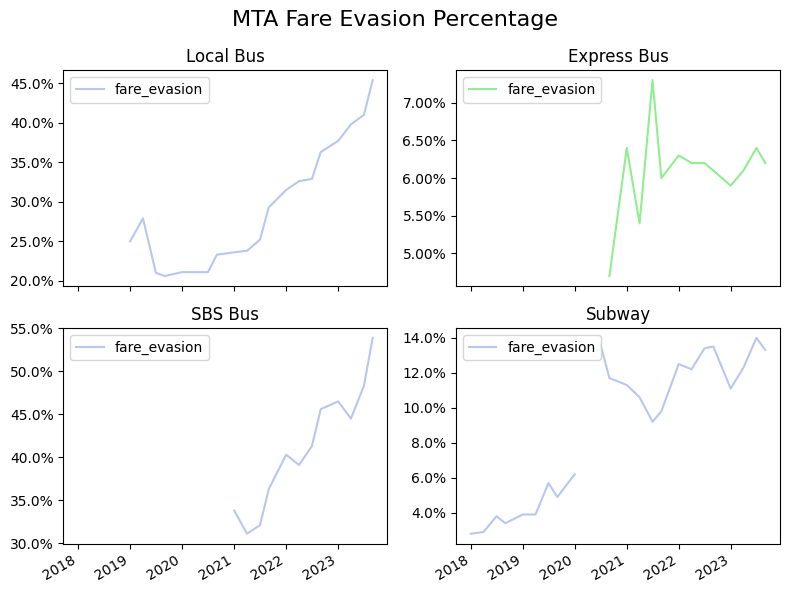

In [2]:
# MTA Bus Fare Evasion
# https://data.ny.gov/Transportation/MTA-Bus-Fare-Evasion-Beginning-2019/uv5h-dfhp/about_data
# MTA Subway Fare Evasion
# https://data.ny.gov/Transportation/MTA-Bus-Fare-Evasion-Beginning-2019/uv5h-dfhp/about_data

data_root = "../data"

bus_fe = pd.read_csv(f'{data_root}/mta_bus_evasion.csv')
bus_fe['year_month'] = pd.to_datetime(bus_fe['year_month'])
bus_fe=bus_fe.reindex(
    ['year_month', 'year', 'month', 'trip_type', 'ridership', 'fare_evasion'], axis=1)

subway_fe = pd.read_csv(f'{data_root}/mta_subway_evasion.csv')
subway_fe['year_month'] = pd.to_datetime(subway_fe['year_month'])
subway_fe=subway_fe.reindex(
    ['year_month', 'year', 'month', 'trip_type', 'ridership', 'fare_evasion'], axis=1)


fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True)


bus_fe[bus_fe['trip_type'] == 'Local'].plot(ax=axes[0, 0], x='year_month', 
                                            y='fare_evasion', xlabel='', title='Local Bus', color='#b9c7f0')

bus_fe[bus_fe['trip_type'] == 'Express'].plot(ax=axes[0,1], x='year_month', y='fare_evasion',
                                              xlabel='', title='Express Bus', color='lightgreen')
bus_fe[bus_fe['trip_type'] == 'SBS'].plot(ax=axes[1,0], x='year_month', y='fare_evasion', color='#b9c7f0',
                                          xlabel='', title='SBS Bus')
subway_fe.plot(ax=axes[1, 1], x='year_month', y='fare_evasion', color='#b9c7f0', xlabel='', title='Subway')

for ax in [*axes[0], * axes[1]]:
    ax.tick_params(which='minor', length=0)
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.legend(loc='upper left')

fig.suptitle('MTA Fare Evasion Percentage', fontsize=16)

plt.tight_layout()
plt.show()

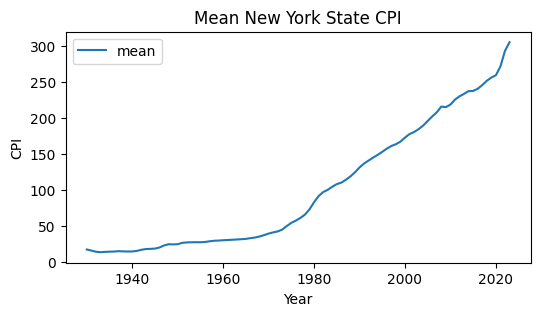

In [3]:
# New York State Mean CPI
# https://data.bls.gov/pdq/SurveyOutputServlet

cpi = pd.read_csv(f'{data_root}/cpi.csv')
cpi.pop('HALF1')
cpi.pop('HALF2')
cpi.set_index('Year', inplace=True)
cpi['mean']=cpi.mean(axis=1)
fig, axes = plt.subplots(1, 1, figsize=(6, 3))
cpi.plot(ax=axes, y='mean', ylabel='CPI', title='Mean New York State CPI')
cpi=cpi.reset_index()
plt.show()

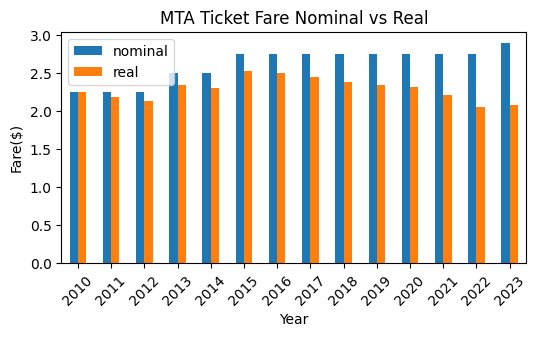

In [4]:
# NYC MTA Ticket Fare 2010-2023
# https://www.6sqft.com/all-the-mta-fare-hikes-over-the-last-100-years-plus-a-video-of-when-it-cost-just-15-cents/

fare=pd.read_csv(f'{data_root}/mta_fare.csv')
fare_vs_cpi = pd.merge(fare, cpi, left_on='year', right_on='Year')[['year', 'fare', 'mean']]
fare_vs_cpi = fare_vs_cpi[fare_vs_cpi['year'] >= 2010].reindex()
fare_vs_cpi['real'] = fare_vs_cpi['fare']/fare_vs_cpi['mean'] * fare_vs_cpi['mean'].iloc[0]
fare_vs_cpi['nominal'] = fare_vs_cpi['fare']
fig, axes = plt.subplots(1, 1, figsize=(6, 3))
ax = fare_vs_cpi.plot(ax=axes, kind='bar', x='year', y=['nominal', 'real'], xlabel='Year',
                      ylabel='Fare($)', title='MTA Ticket Fare Nominal vs Real')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

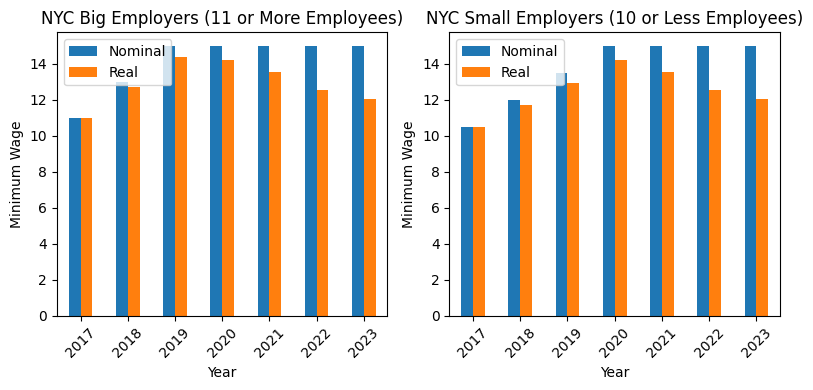

In [5]:
# NYC Big and Small Employers Minimum Wage 2017-2023
# https://www.ny.gov/new-york-states-minimum-wage/new-york-states-minimum-wage

nyc_min_wage_normalzied=pd.read_csv(f'{data_root}/nyc_min_wage_nomalized.csv')
nyc_big = nyc_min_wage_normalzied[nyc_min_wage_normalzied['region'] == 'NYC_Big']
nyc_big=nyc_big.pivot_table(nyc_big, index=['year', 'region'], columns='type')
nyc_big=nyc_big.reset_index()
nyc_big=pd.concat([nyc_big['year'], nyc_big['min_wage']], axis=1)
nyc_big.set_index('year', inplace=True)

nyc_small = nyc_min_wage_normalzied[nyc_min_wage_normalzied['region'] == 'NYC_Small']
nyc_small=nyc_small.pivot_table(nyc_small, index=['year', 'region'], columns='type')
nyc_small=nyc_small.reset_index()
nyc_small=pd.concat([nyc_small['year'], nyc_small['min_wage']], axis=1)
nyc_small.set_index('year', inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = nyc_big.plot(ax=axes[0], kind='bar', ylabel='Minimum Wage', xlabel='Year',
                  title='NYC Big Employers (11 or More Employees)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# Plot the second diagram
ax=nyc_small.plot(ax=axes[1], kind='bar', ylabel='Minimum Wage', xlabel='Year',
                  title='NYC Small Employers (10 or Less Employees)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.tight_layout()
plt.show()

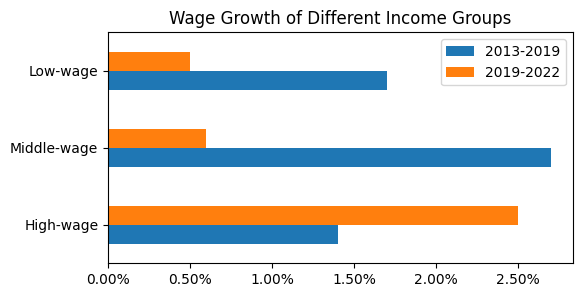

In [6]:
# NYC Low, Middle, High Wage Income Group Growth Comparison
# https://www.datawrapper.de/_/aY1Yh/

hml_wages_growth_data = {
    'group': ['High-wage', 'Middle-wage', 'Low-wage'],   
    '2013-2019': [0.014, 0.027, 0.017],
    '2019-2022': [0.025, 0.006, 0.005]
}

hml_wages = pd.DataFrame(hml_wages_growth_data)

hml_wages.set_index('group', inplace=True)
fig, axes = plt.subplots(1, 1, figsize=(6, 3))
ax = hml_wages.plot(ax=axes, kind='barh', ylabel='', title='Wage Growth of Different Income Groups')
ax.xaxis.set_major_formatter(PercentFormatter(1))

plt.show()

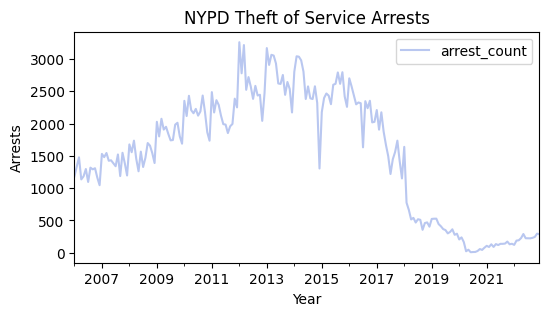

In [7]:
# NYPD Theft of Service Arrests 2006 - 2022
# https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u/about_data

tos_raw = pd.read_csv(f'{data_root}/theft_of_services.csv')
tos_raw['ARREST_DATE']=pd.to_datetime(tos_raw['ARREST_DATE'])
tos_raw = tos_raw.sort_values(by=['ARREST_DATE', 'ARREST_KEY'], ascending=[True, True])
tos_raw['year'] = tos_raw['ARREST_DATE'].dt.year
tos_raw['mon'] = tos_raw['ARREST_DATE'].dt.month
tos_counts = tos_raw.groupby(['year', 'mon'], as_index=False).count()
tos_counts.head()
tos_counts['arrest_count']=tos_counts['ARREST_KEY']
tos_arrest_monthly = tos_counts.loc[:, ['year', 'mon', 'arrest_count']]
tos_arrest_monthly['year_month']=  pd.to_datetime(tos_arrest_monthly['year'].astype(str)
                                                  + '-' 
                                                  + tos_arrest_monthly['mon'].astype(str)
                                                  + '-01')
fig, axes = plt.subplots(1, 1, figsize=(6, 3))
ax=tos_arrest_monthly.plot(ax=axes, x='year_month', y='arrest_count', xlabel='Year',
                           ylabel='Arrests', title='NYPD Theft of Service Arrests', color='#b9c7f0')
tos_arrest_monthly = tos_arrest_monthly[['year_month', 'year', 'mon', 'arrest_count']]
plt.show()

/var/folders/jp/5s_9hd2d4_5gkkj4yxpty2200000gp/T/ipykernel_12948/3959186926.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


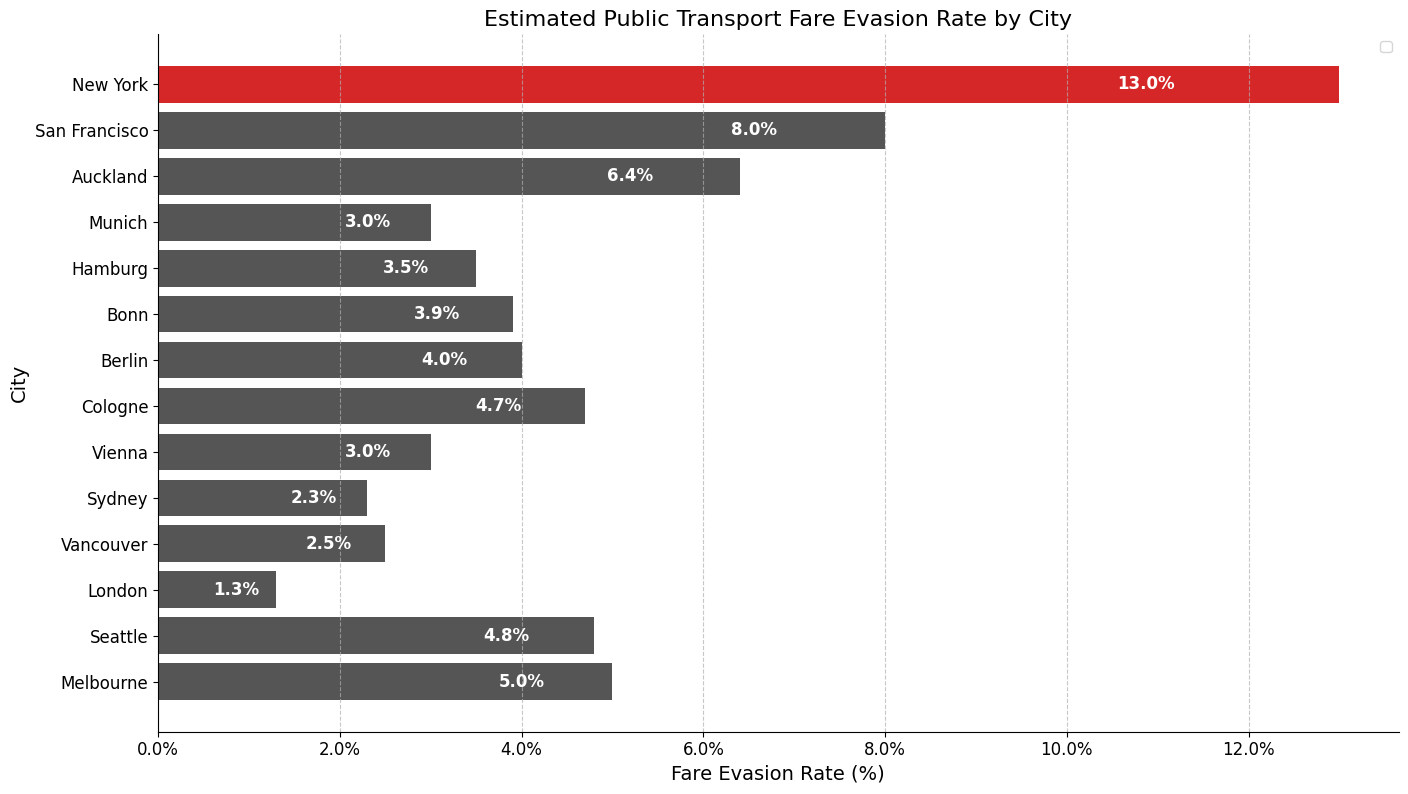

In [8]:
# Fare Evasion Rate Separated by Major Global Cities 
# https://www.researchgate.net/publication/316785046_Fare_evasion_in_public_transport_A_time_series_approach 
cities = ['Melbourne', 'Seattle', 'London', 'Vancouver', 'Sydney', 'Vienna',
          'Cologne', 'Berlin', 'Bonn', 'Hamburg', 'Munich', 'Auckland', 'San Francisco', 'New York']
fare_evasion_rates = [5.0, 4.8, 1.3, 2.5, 2.3, 3.0, 4.7, 4.0, 3.9, 3.5, 3.0, 6.4, 8.0, 13.0]  # Percentage rates

#Colors and figure formatting
colors = ['#555555' if city != 'New York' else '#d62728' for city in cities]
plt.figure(figsize=(14, 8))
bars = plt.barh(cities, fare_evasion_rates, color=colors)

# Labels, title
plt.xlabel('Fare Evasion Rate (%)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.title('Estimated Public Transport Fare Evasion Rate by City', fontsize=16)

plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()

# Remove top and right spines for cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(labelsize=12)

# Text labels for percentage values
for bar in bars:
    plt.text(
        bar.get_width() - (bar.get_width() * 0.15) - 0.5,
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width()}%',
        va='center',
        color='white',
        fontsize=12,
        fontweight='bold'
    )
plt.show()

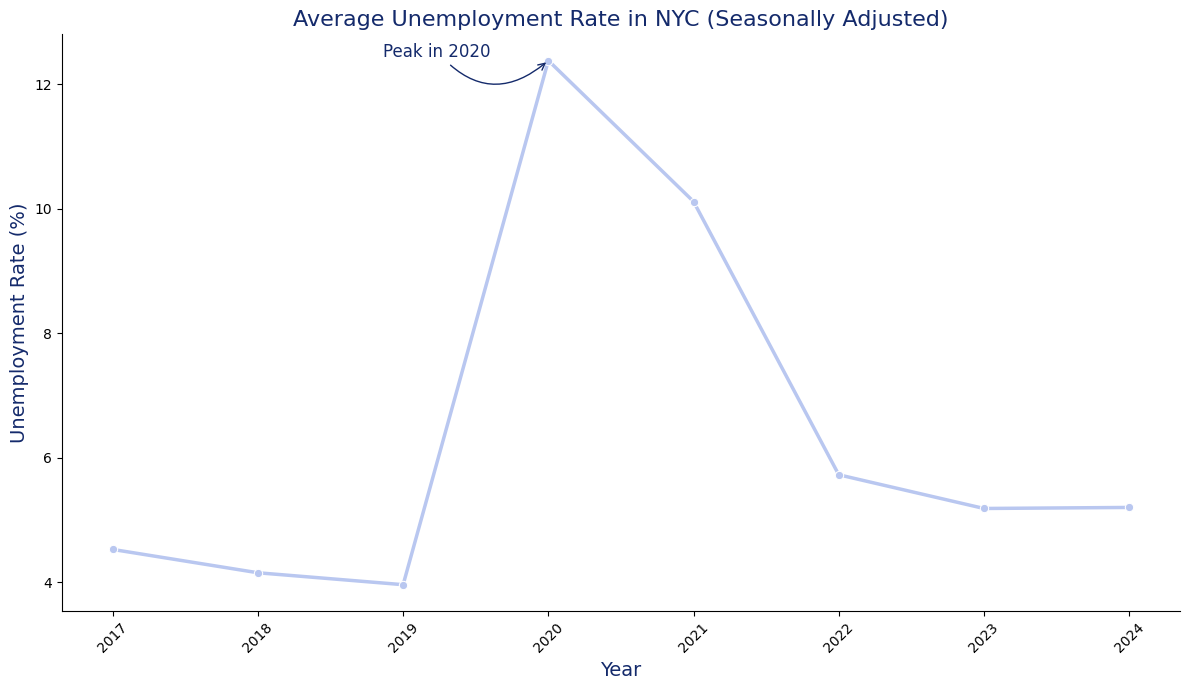

In [9]:
# Average Unemployment from 2017 - 2024 in NYC 
# https://www.bls.gov/regions/northeast/data/xg-tables/ro2xglausnyc.htm 
# Data frame creation
data = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Avg Unemployment Rate': [4.525, 4.15,
                              3.958333333, 12.38333333, 10.11666667, 5.725,
                              5.183333333, 5.2]
}
df = pd.DataFrame(data)

# Plotting the unemployment rate
plt.figure(figsize=(12, 7))
ax = sns.lineplot(x='Year', y='Avg Unemployment Rate', data=df, marker='o', linewidth=2.5, 
                  linestyle='-', color='#b9c7f0')

# Highlighting the highest point (2020) in a different color
highest_point = df['Avg Unemployment Rate'].max()
ax.annotate('Peak in 2020', xy=(df['Year'][df['Avg Unemployment Rate'].idxmax()], highest_point),
            xycoords='data', xytext=(-80, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5', color='#142a6b'),
            ha='center', va='bottom', fontsize=12, color='#142a6b')

# Formatting
sns.despine()  # Remove the top and right spines
plt.xticks(df['Year'], rotation=45)
plt.title('Average Unemployment Rate in NYC (Seasonally Adjusted)', fontsize=16, color='#142a6b')
plt.xlabel('Year', fontsize=14, color='#142a6b')
plt.ylabel('Unemployment Rate (%)', fontsize=14, color='#142a6b')
ax.grid(False)

# Display the plot with a tight layout for neat presentation
plt.tight_layout()
plt.show()